In [1]:
%cd ..
%load_ext autoreload
%autoreload 2
import pickle

/Users/gimli/projects/igre


In [68]:
with open("data/processed/metacentrum/37-pickled.pkl", "rb") as src:
    data = pickle.load(src)

In [69]:
import numpy as np

In [70]:
import pandas as pd
df = pd.DataFrame(data)
df.columns = ["x_shift", "y_shift", "distance", "sample", "repeat", "x_est", "y_est"]

In [77]:
df.groupby(["dist", "sample", "distance"]).mean()

x_shift    y_shift    repeat       x_est  \
dist      sample distance                                             
2.000000  1      -7            0.0   2.000000  6.000000 -342.725800   
                 -5            0.0   2.000000  6.000000 -215.000183   
                 -3            0.0   2.000000  6.000000    0.000321   
                 -1            0.0   2.000000  6.000000    0.001098   
          2      -7            0.0   2.000000  6.000000  108.000244   
                 -5            0.0   2.000000  6.000000    1.000046   
                 -3            0.0   2.000000  6.000000   -0.000207   
                 -1            0.0   2.000000  6.000000    0.000097   
          3      -7            0.0   2.000000  6.000000   58.000412   
                 -5            0.0   2.000000  6.000000   53.000397   
                 -3            0.0   2.000000  6.000000   -0.000068   
                 -1            0.0   2.000000  6.000000   -0.000165   
          4      -7            0.0   2.000000  6.000000    1.000031   
                 -5            0.0   2.000000  6.000000   -0.000563   
                 -3            0.0   2.000000  6.000000   -0.000019   
                 -1            0.0   2.000000  6.000000    0.000505   
          5      -7            0.0   2.000000  6.000000   -0.000132   
                 -5            0.0   2.000000  6.000000    0.000671   
                 -3            0.0   2.000000  6.000000   -0.001055   
                 -1            0.0   2.000000  6.000000   -0.000043   
          6      -7            0.0   2.000000  6.000000    1.000210   
                 -5            0.0   2.000000  6.000000    0.999880   
                 -3            0.0   2.000000  6.000000    0.001386   
                 -1            0.0   2.000000  6.000000    0.000135   
          7      -7            0.0   2.000000  6.000000  558.921448   
                 -5            0.0   2.000000  6.000000  428.268921   
                 -3            0.0   2.000000  6.000000    0.999804   
                 -1            0.0   2.000000  6.000000   -0.001382   
          8      -7            0.0   2.000000  6.000000  -37.999519   
                 -5            0.0   2.000000  6.000000  -37.000492   
...                            ...        ...       ...         ...   
64.031242 37     -3          -50.0  33.333333  4.583333   49.832990   
                 -1          -50.0  33.333333  4.583333   49.999761   
          38     -7          -50.0  33.333333  4.583333   49.999997   
                 -5          -50.0  33.333333  4.583333   49.916577   
                 -3          -50.0  33.333333  4.583333   50.000134   
                 -1          -50.0  33.333333  4.583333   50.000026   
          39     -7          -50.0  33.333333  4.583333   49.916547   
                 -5          -50.0  33.333333  4.583333   49.750050   
                 -3          -50.0  33.333333  4.583333   50.000028   
                 -1          -50.0  33.333333  4.583333   50.009370   
          40     -7          -50.0  33.333333  4.583333   50.083190   
                 -5          -50.0  33.333333  4.583333   50.000044   
                 -3          -50.0  33.333333  4.583333   49.916768   
                 -1          -50.0  33.333333  4.583333   49.916706   
          41     -7          -50.0  33.333333  4.583333   15.500494   
                 -5          -50.0  33.333333  4.583333   18.422701   
                 -3          -50.0  33.333333  4.583333   20.500775   
                 -1          -50.0  33.333333  4.583333   19.083984   
          42     -7          -50.0  33.333333  4.583333   53.001295   
                 -5          -50.0  33.333333  4.583333   45.163161   
                 -3          -50.0  33.333333  4.583333   42.411268   
                 -1          -50.0  33.333333  4.583333   39.667038   
          43     -7          -50.0  33.333333  4.583333 -188.768426   
                 -5          -50.0  33.333333  4.58

In [72]:
set(df["distance"])

{-7, -5, -3, -1}

In [73]:
df["err"] = np.sqrt(np.power((df["x_shift"] + df["x_est"]),2) + np.power((df["y_shift"] + df["y_est"]),2))

In [74]:
df["dist"] = np.sqrt(np.power(df["x_shift"],2) + np.power(df["y_shift"],2))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1313cdb10>,
      dtype=object)

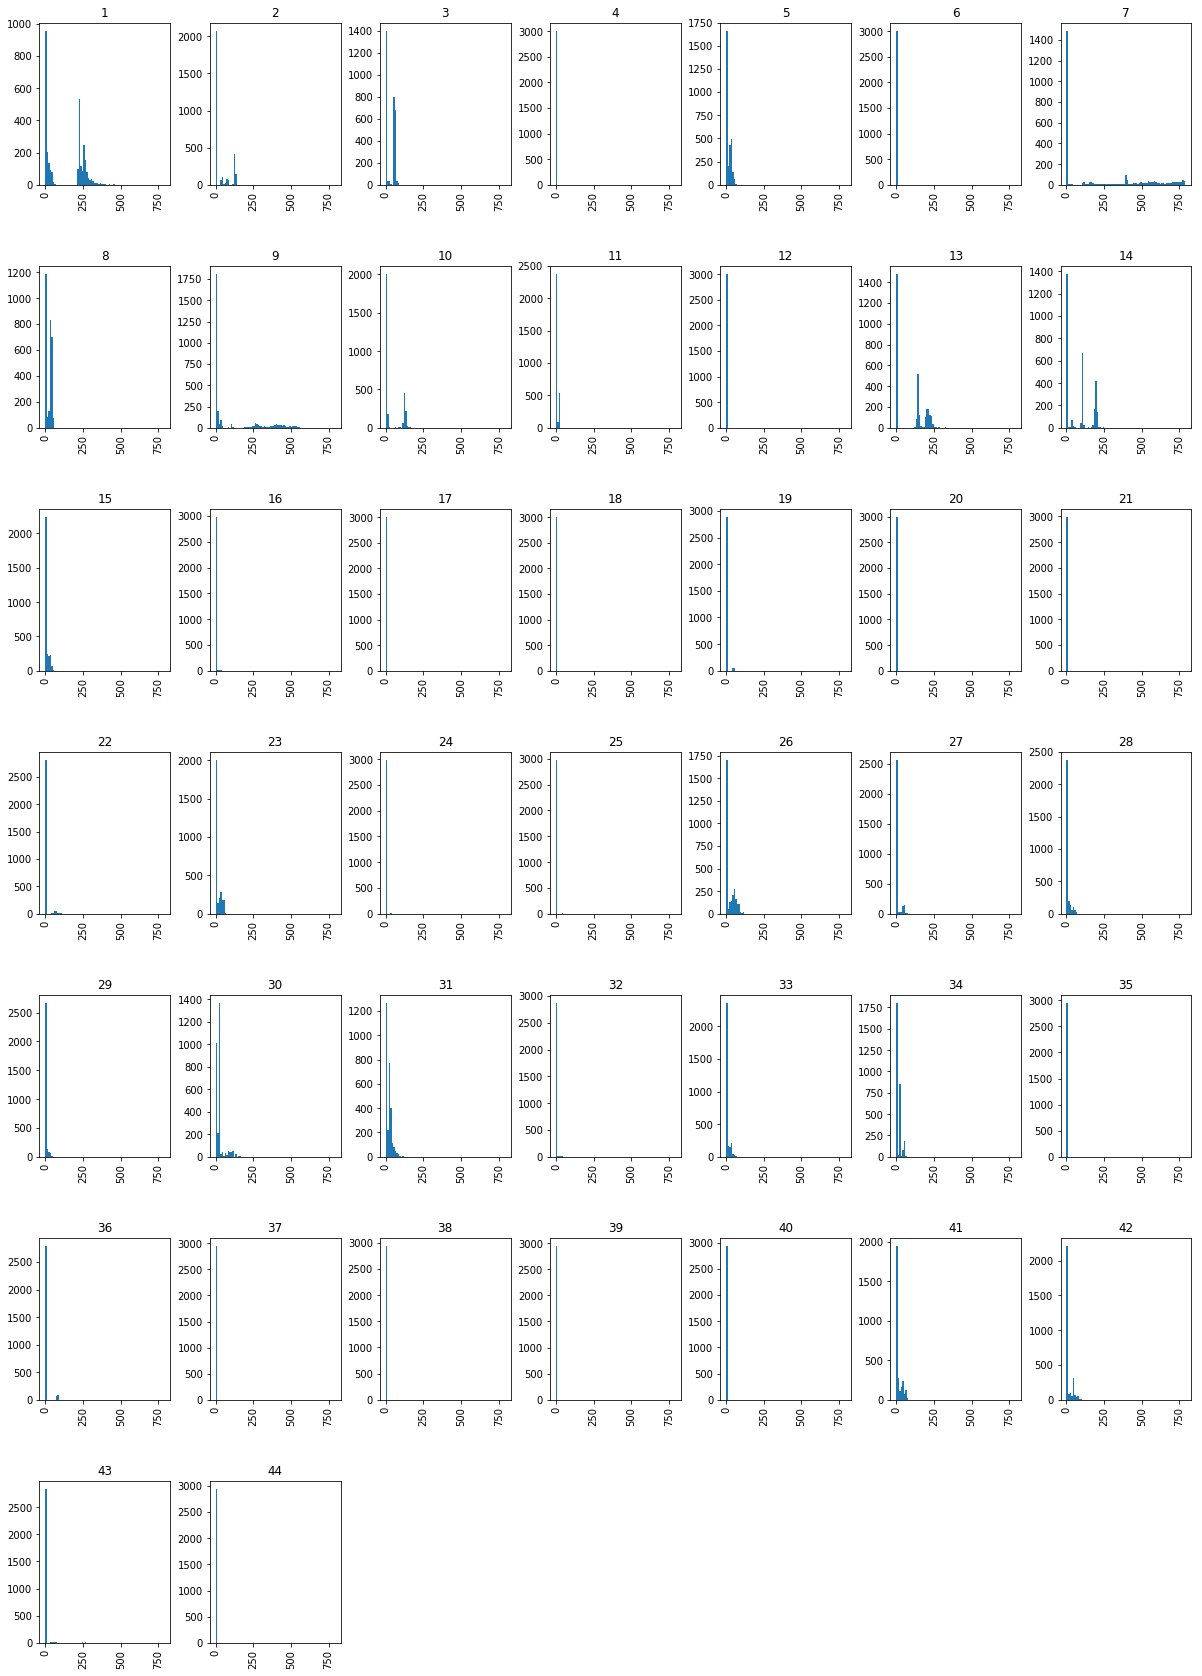

In [75]:
df.hist(column="err", by="sample", figsize=(20,30), bins=range(0,800,10))

In [67]:
converted = df.dropna(how="any").groupby(["x_shift", "y_shift", "distance"])["err"].agg("sum").reset_index()

In [28]:
import matplotlib.pyplot as plt

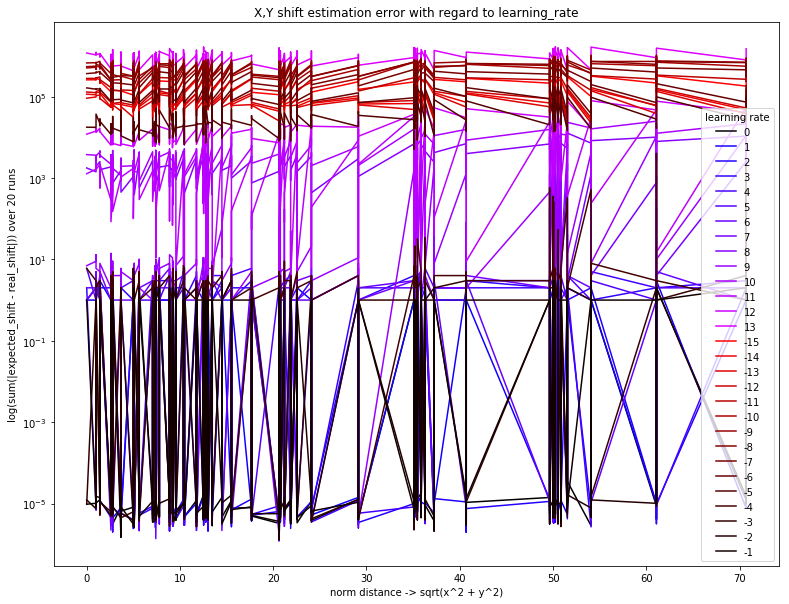

In [101]:
from scipy.ndimage.filters import maximum_filter1d as f1d
from scipy.ndimage.filters import gaussian_filter1d as f1gd
plt.figure(figsize=(13,10))
for dist in set(converted["distance"]):
    f1 = converted["distance"]==dist 
    srt = np.asarray(sorted(np.asarray(converted.where(f1).dropna(how="any")), 
           key=lambda x: np.sqrt(np.power(x[0],2) + np.power(x[1],2))))
    plt.plot(np.sqrt(np.power(srt[:, 0],2) + np.power(srt[:, 1],2)), srt[:, 3], 
             label=dist,
            color=[np.abs(dist)/15, 0.0, float(np.max([0, np.sign(dist)]))])
plt.yscale("log")
plt.legend(title="learning rate")
plt.ylabel("log(sum(|expected_shift - real_shift|)) over 20 runs")
plt.xlabel("norm distance -> sqrt(x^2 + y^2)")
plt.title("X,Y shift estimation error with regard to learning_rate")
plt.show()
#plt.savefig("reports/refine-shift.svg")

<IPython.core.display.Javascript object>


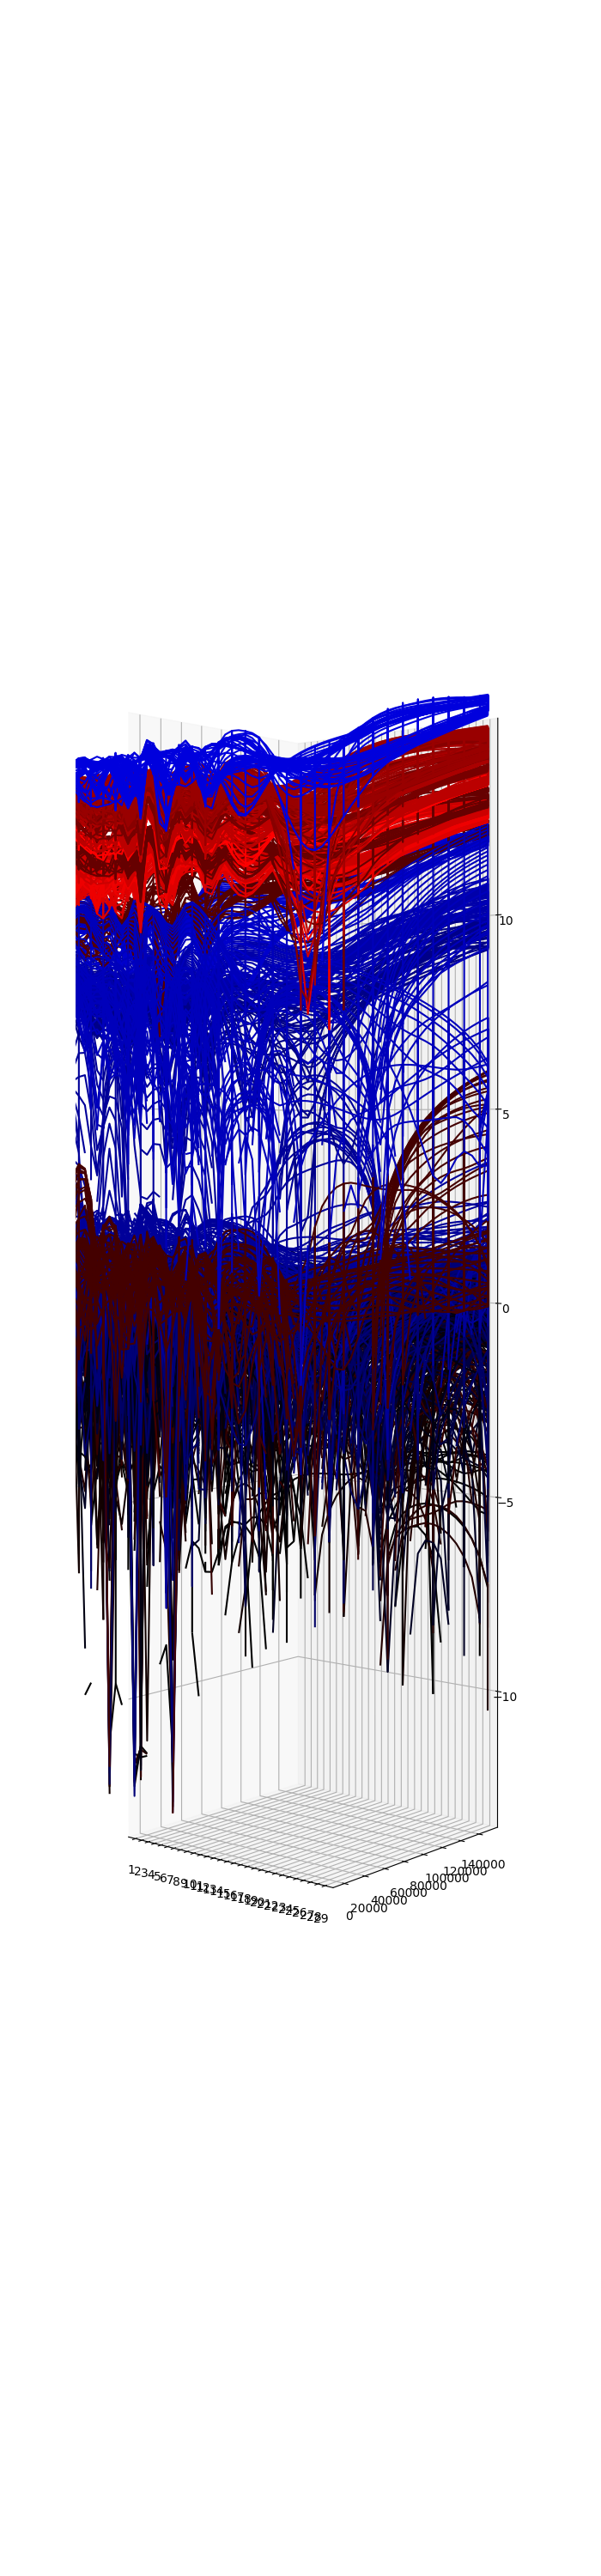

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [157]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import scipy
#X = np.array(list(set(ddd["x_shift"])))
#Y = np.array(list(set(ddd["y_shift"])))
#x,y = np.meshgrid(X,Y)
X = np.arange(-50,50,1)
Y = np.arange(-50,50,1)
x, y = np.meshgrid(X,Y)
fig = plt.figure(figsize=(7,30))
ax = fig.gca(projection="3d")
for dist in set(converted["distance"]):
    ddd = converted.where(converted["distance"]==dist).dropna(how="any")
    Z = scipy.interpolate.griddata((ddd["x_shift"], ddd["y_shift"]), ddd["err"], (x, y), method="cubic")
    ax.plot_wireframe(x,y, np.log(Z), color = [np.min([0, np.sign(dist)])*(-1)*np.abs(dist)/15, 0.0, np.abs(dist)/15 * float(np.max([0, np.sign(dist)]))])
plt.show()

In [61]:
errors = []
for dist in sorted(set(df["dist"])):
    errors.append(np.asarray(df.where(df["dist"]==dist).dropna(how="any")["err"]))

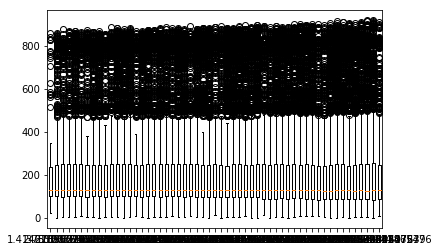

In [63]:
plt.figure()
plt.boxplot(errors, labels=sorted(set(df["dist"])))
plt.savefig("reports/refine-shift-samples.svg")

### TODO: map convergence to correlation

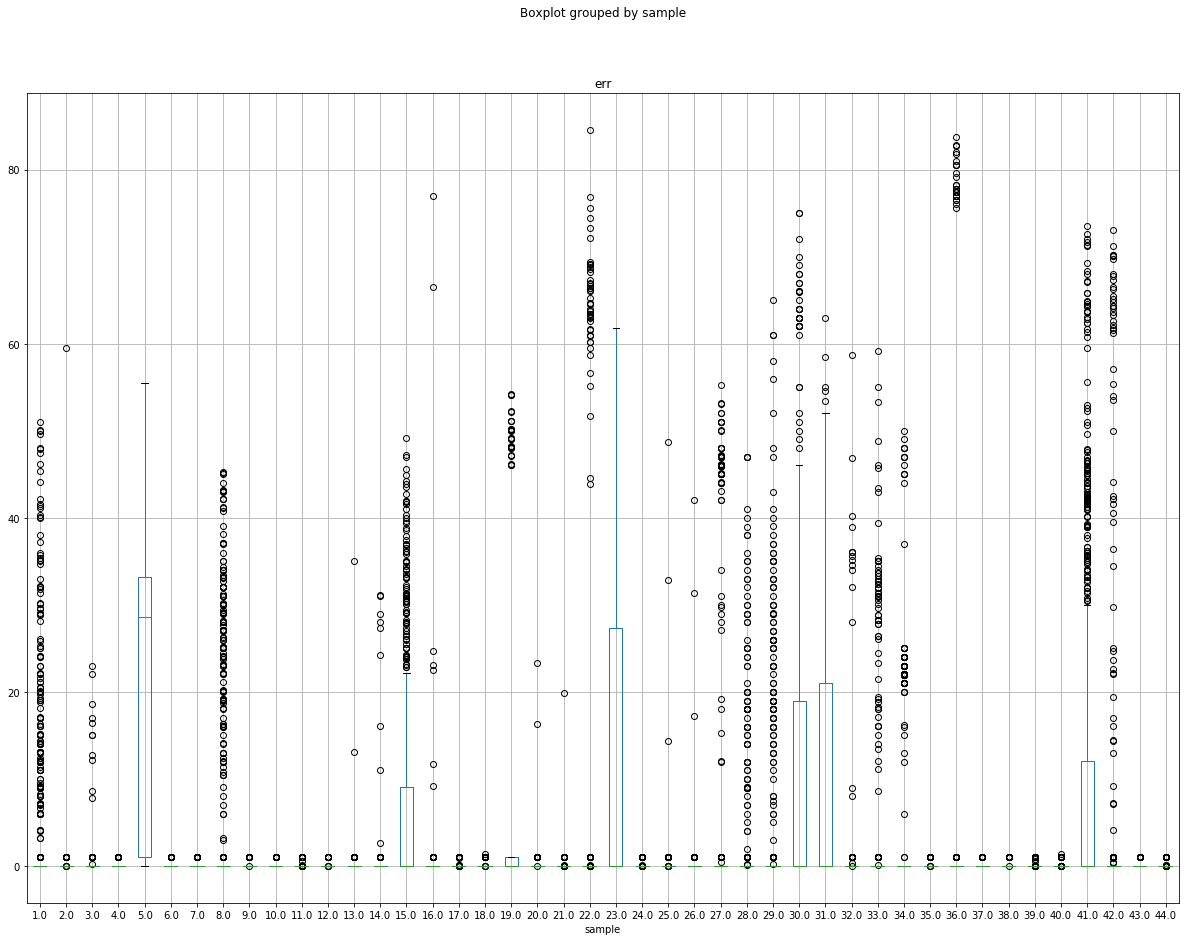

In [87]:
distfilt = df["distance"] == -1
df.where(distfilt).boxplot(figsize=(20,15), column="err", by="sample")    

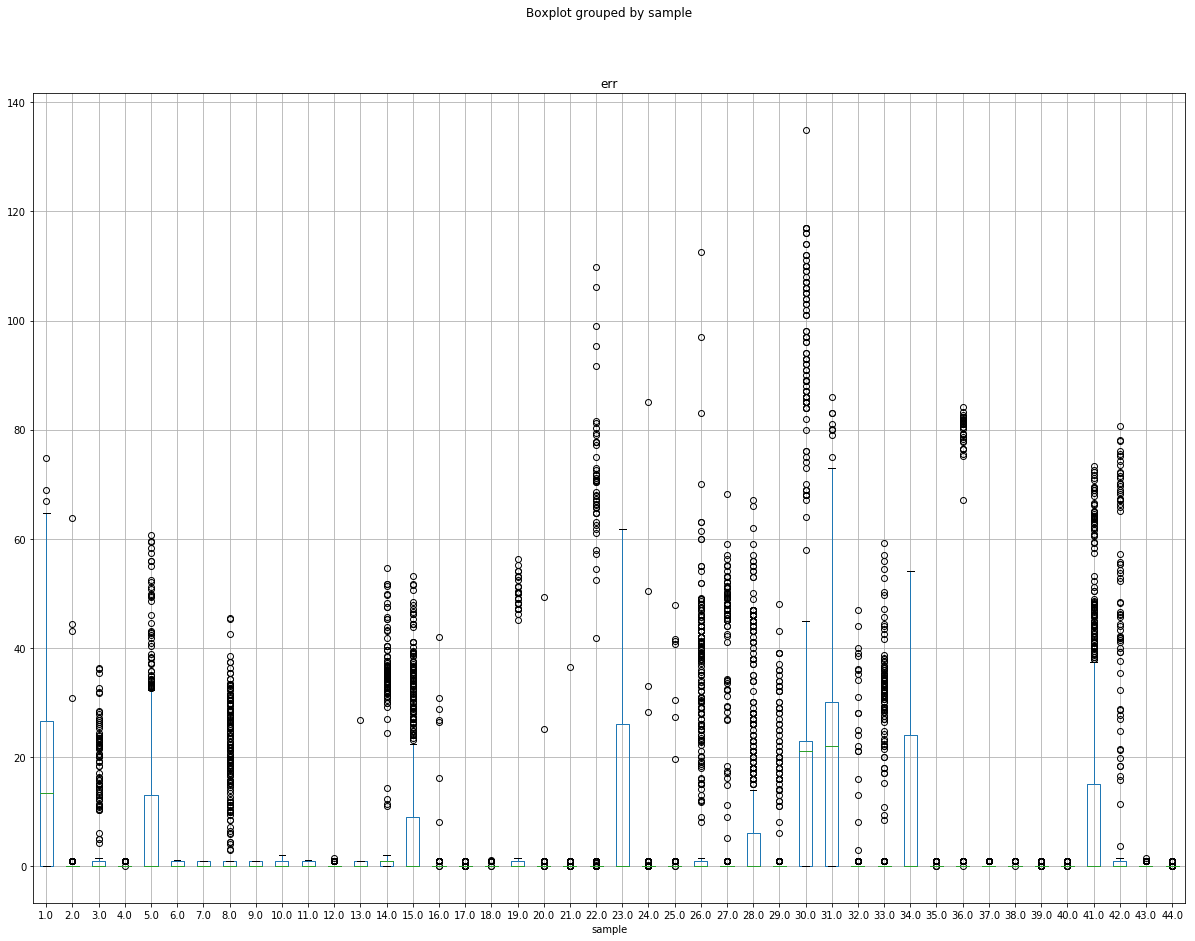

In [88]:
distfilt = df["distance"] == -3
df.where(distfilt).boxplot(figsize=(20,15), column="err", by="sample")  

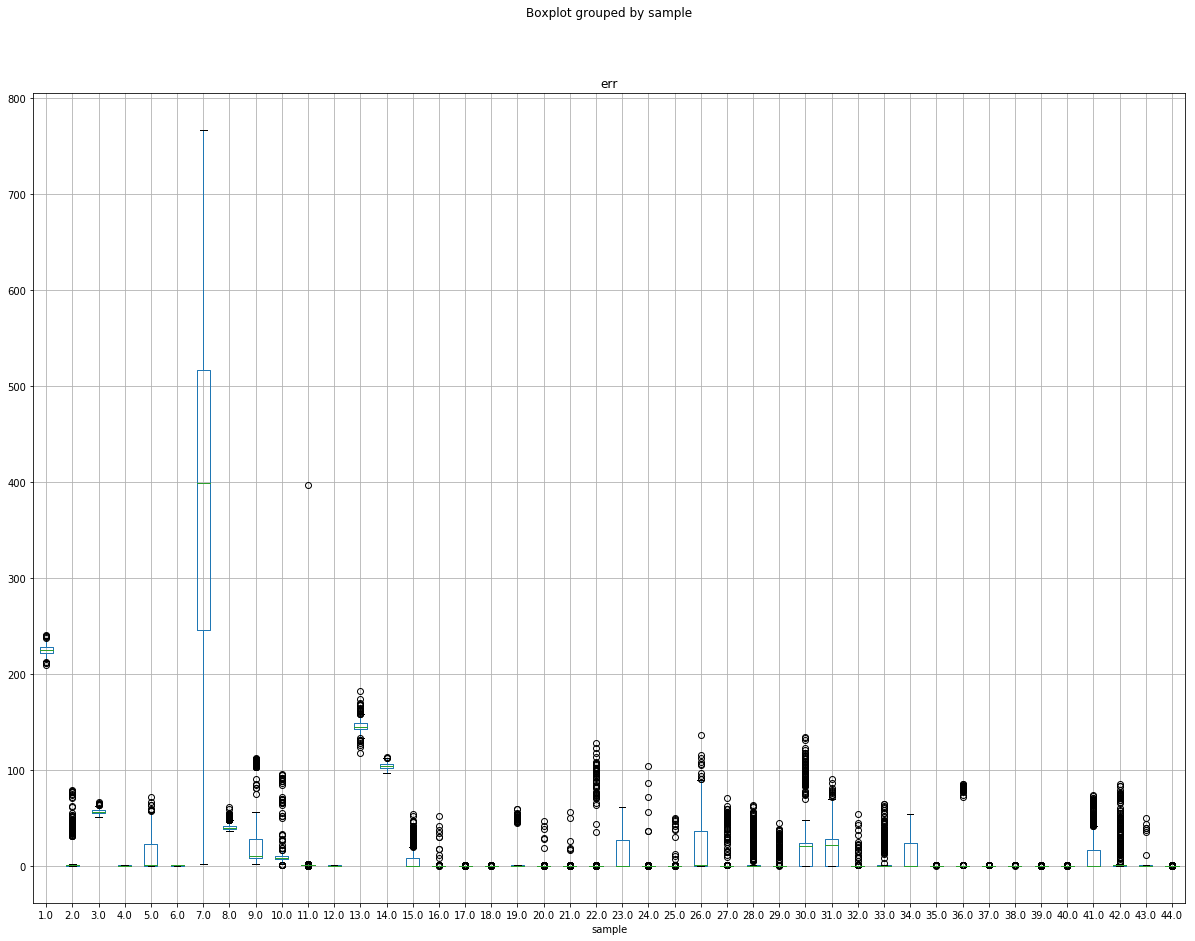

In [89]:
distfilt = df["distance"] == -5
figure = plt.figure(figsize=(20,15))
df.where(distfilt).groupby("sample")["err"]

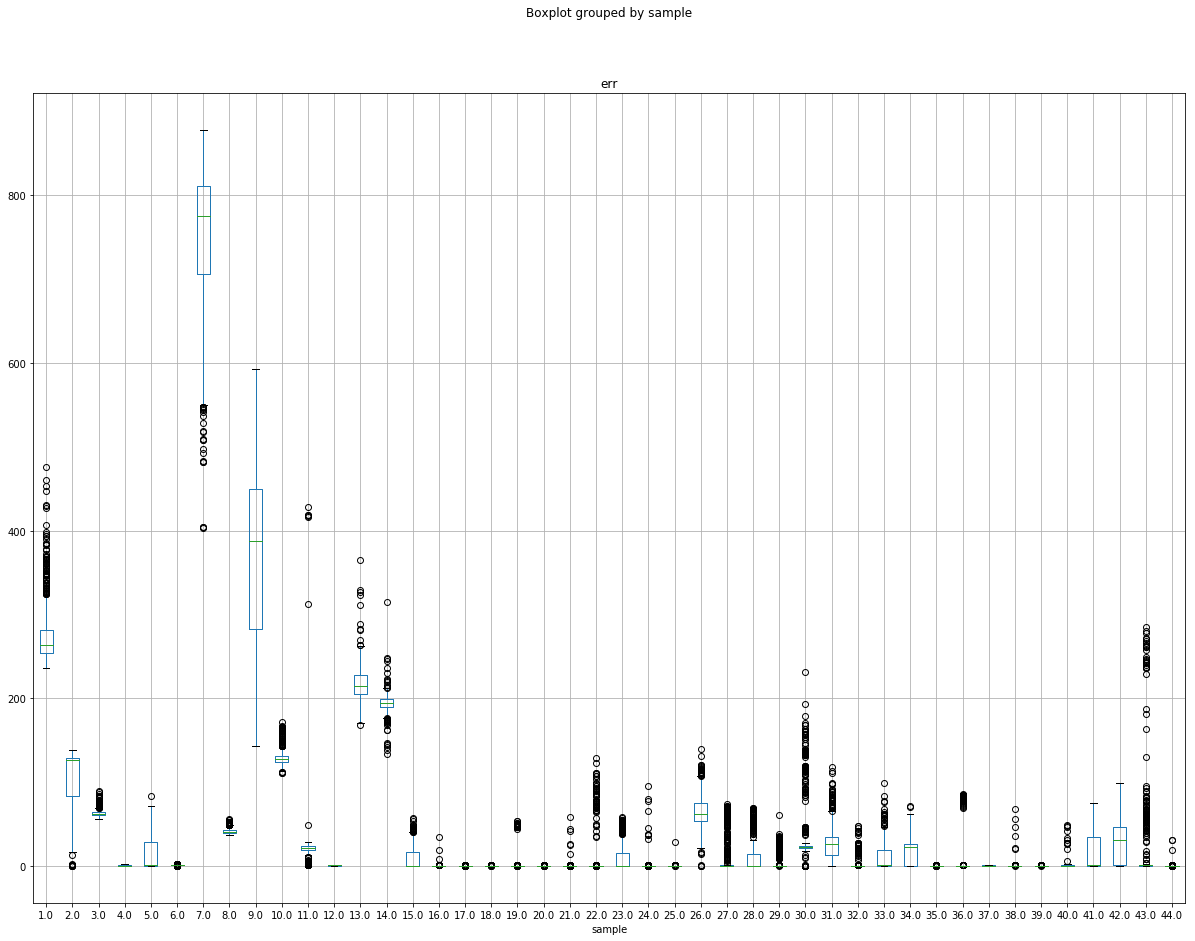

In [90]:
distfilt = df["distance"] == -7
df.where(distfilt).boxplot(figsize=(20,15), column="err", by="sample")  

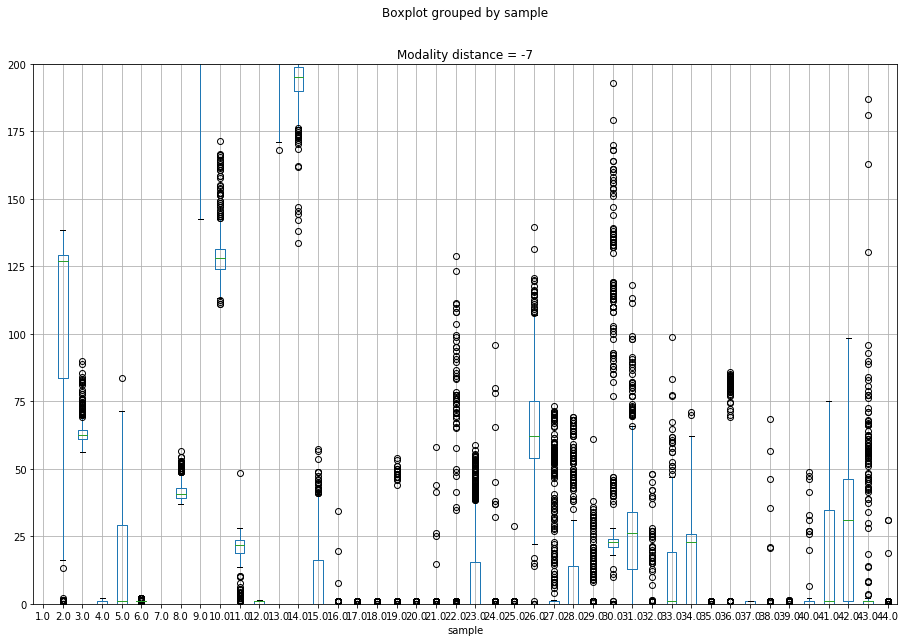

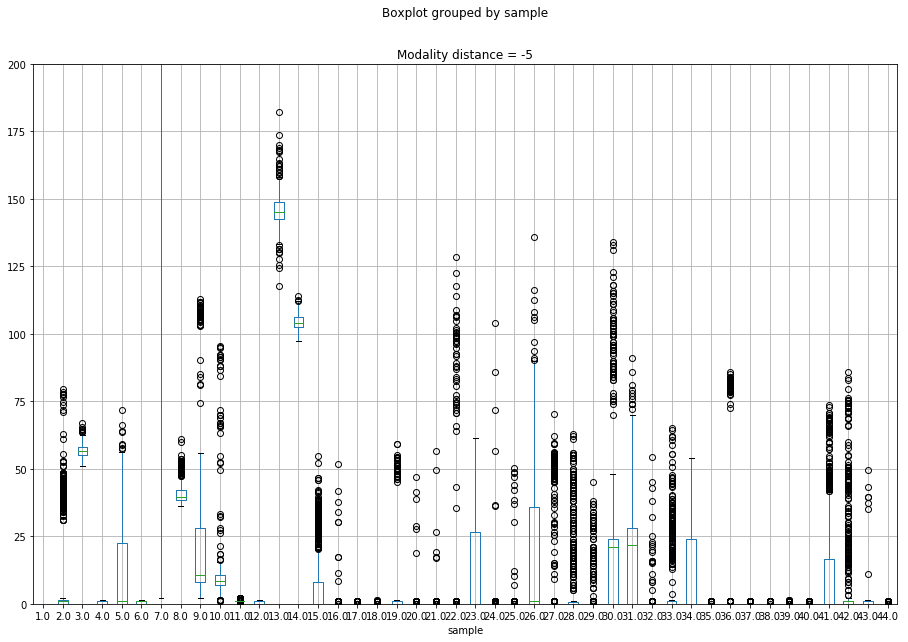

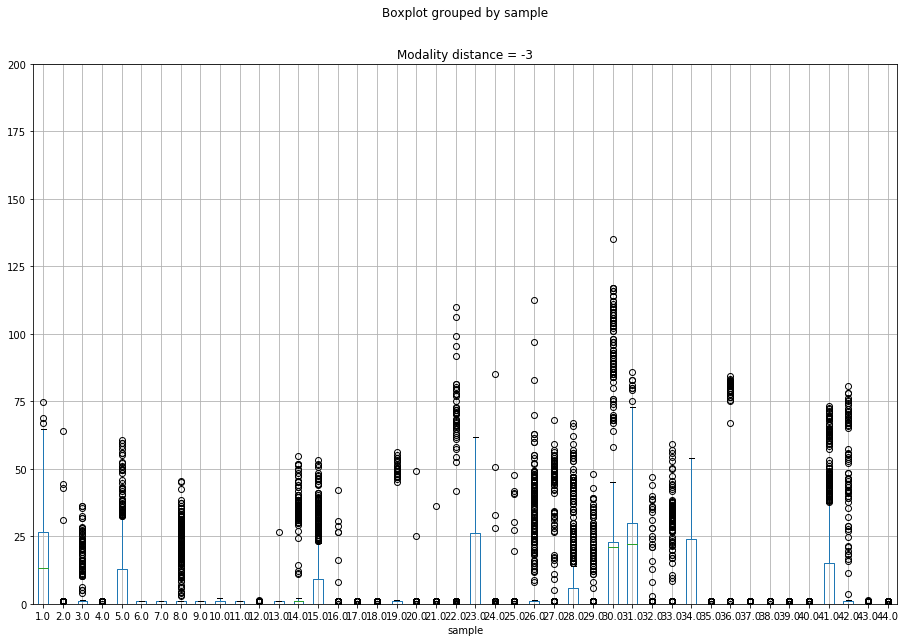

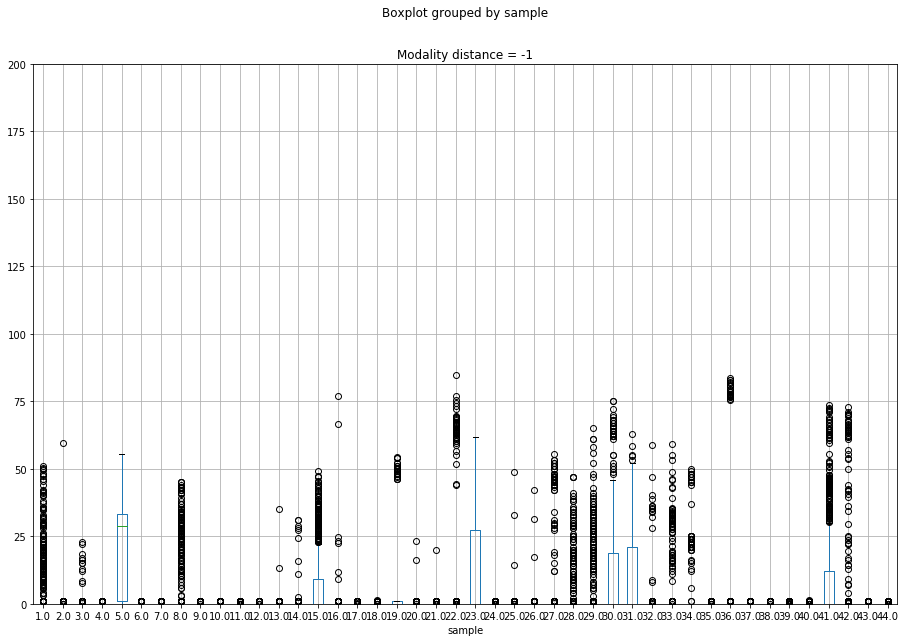

In [106]:
for dist in set(df["distance"]):
    distfilt = df["distance"] == dist
    fig, ax_new = plt.subplots(1,1, sharey=False, figsize=(15,10))
    bp = df.where(distfilt).boxplot(by="sample", column="err", ax=ax_new)
    plt.title(f"Modality distance = {dist}")
    plt.ylim(0,200)
    plt.show()